In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records
FEATURES:

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

 

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

 





In [395]:
df=pd.read_excel('flight_price_train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [396]:
# checking for null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [397]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


There is two nan value in dataset which is in same row, we can fill the value using the
same value reference

In [398]:
df.loc[(df["Source"]=='Delhi') & (df["Airline"]=='Air India') &(df["Destination"]=='Cochin')&(df["Duration"]=='23h 40m')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
1336,Air India,9/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 10 Mar,23h 40m,2 stops,No info,10660
1616,Air India,24/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 25 May,23h 40m,1 stop,No info,7480
1679,Air India,3/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 04 Jun,23h 40m,2 stops,No info,10975
1862,Air India,27/06/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Jun,23h 40m,2 stops,No info,10975
2343,Air India,15/05/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 16 May,23h 40m,2 stops,No info,10975
2554,Air India,15/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 16 May,23h 40m,1 stop,No info,7480
3272,Air India,27/03/2019,Delhi,Cochin,DEL → HYD → MAA → COK,09:45,09:25 28 Mar,23h 40m,2 stops,No info,7090
3595,Air India,18/05/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 19 May,23h 40m,1 stop,No info,8372
4280,Air India,1/04/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 02 Apr,23h 40m,1 stop,No info,5117
4351,Air India,27/06/2019,Delhi,Cochin,DEL → MAA → COK,09:45,09:25 28 Jun,23h 40m,1 stop,No info,7480


Comparing the similer value we found Route='DEL-> MAA -> COK" and Total Stop ="1 Stop"

In [399]:
df.fillna({'Route':'DEL → MAA → COK', 'Total_Stops':'1 stop'}, inplace=True)

<AxesSubplot:>

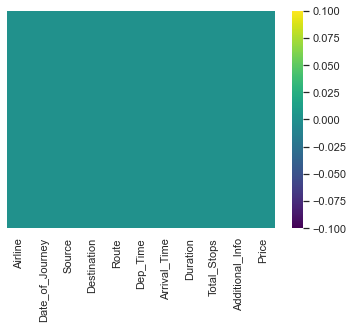

In [400]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [401]:
#extracing the month
df['month']=pd.DatetimeIndex(df['Date_of_Journey']).month

In [402]:
#function for encoding month name
def change_month(col):
    if col==1:
        return 'Jan'
    elif col==2:
        return 'Feb'
    elif col==3:
        return 'Mar'
    elif col==4:
        return 'Apr'
    elif col==5:
        return 'May'
    elif col==6:
        return 'Jun'
    elif col==7:
        return 'Jul'
    elif col==8:
        return 'Aug'
    elif col==9:
        return 'Sep'
    elif col==10:
        return 'Oct'
    elif col==11:
        return 'Nov'
    else:
        return 'Dec'
    

df['month']=df['month'].apply(change_month)

In [403]:
duration=df['Duration'].tolist()

In [404]:
# converting the hours and minunits into minutes
for i in range(0,len(duration)):
    duration[i]=duration[i].replace("h","*60").replace(" ","+").replace("m","")

In [405]:
for i in range(0,len(duration)):
    duration[i]=eval(duration[i])

In [406]:
df['Duration_Mnt']=pd.DataFrame({'Duration_Mnt':duration})

In [407]:
df['DepTime']=df.Dep_Time.str.split(':').str[0]
df['ArrTime']=df.Arrival_Time.str.split(':').str[0]

In [408]:
df[["DepTime","ArrTime"]]=df[["DepTime","ArrTime"]].apply(pd.to_numeric)

In [409]:
def set_timing(x):
    if (x > 4) and (x <=8):
        return 'Early Morning'
    elif (x > 8) and (x <=12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Noon'
    elif (x >16) and (x <= 20):
        return 'Eve'
    elif (x >20) and (x <=24):
        return 'Night'
    elif (x <= 4):
        return 'Late Night'

In [410]:
df['DepTime']=df['DepTime'].apply(set_timing)
df['ArrTime']=df['ArrTime'].apply(set_timing)

In [411]:
df.Total_Stops.value_counts()

1 stop      5626
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [412]:
# Creating columns for via info, initilised with none
df['via1']='None'
df['via2']='None'
df['via3']='None'
df['via4']='None'

In [413]:
#strored the via location in different list for via updation
df['route1']=df.Route.str.split(' ').str[2]
df['route2']=df.Route.str.split(' ').str[4]
df['route3']=df.Route.str.split(' ').str[6]
df['route4']=df.Route.str.split(' ').str[8]

added more four columns , filled up with split data base in route data

In [414]:
df['via1']=np.where((df['Total_Stops']=='1 stop'),df['route1'],df['via1'])
df['via1']=np.where((df['Total_Stops']=='2 stops'),df['route1'],df['via1'])
df['via1']=np.where((df['Total_Stops']=='3 stops'),df['route1'],df['via1'])
df['via1']=np.where((df['Total_Stops']=='4 stops'),df['route1'],df['via1'])

df['via2']=np.where((df['Total_Stops']=='2 stops'),df['route2'],df['via2'])
df['via2']=np.where((df['Total_Stops']=='3 stops'),df['route2'],df['via2'])
df['via2']=np.where((df['Total_Stops']=='4 stops'),df['route2'],df['via2'])

df['via3']=np.where((df['Total_Stops']=='3 stops'),df['route3'],df['via3'])
df['via3']=np.where((df['Total_Stops']=='4 stops'),df['route3'],df['via3'])

df['via4']=np.where((df['Total_Stops']=='4 stops'),df['route4'],df['via4'])


updated the via1,via2,via3,via4 columns based on condition of Total stops 

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  month            10683 non-null  object
 12  Duration_Mnt     10683 non-null  int64 
 13  DepTime          10683 non-null  object
 14  ArrTime          10683 non-null  object
 15  via1             10683 non-null  object
 16  via2             10683 non-null  object
 17  via3             10683 non-null

# Explodiatry Data Analysis

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

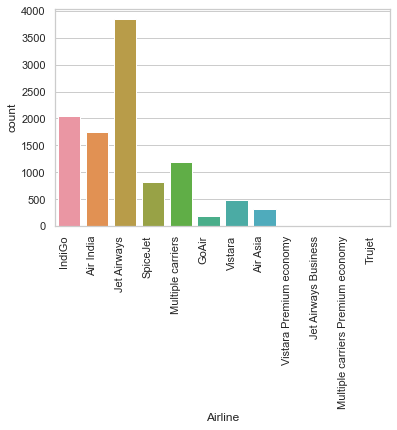

In [416]:
chart=sns.countplot(x='Airline',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) As per the data Jet Airways maximum number of flights.
In second position it is Indigo

[Text(0, 0, 'Banglore'),
 Text(1, 0, 'Kolkata'),
 Text(2, 0, 'Delhi'),
 Text(3, 0, 'Chennai'),
 Text(4, 0, 'Mumbai')]

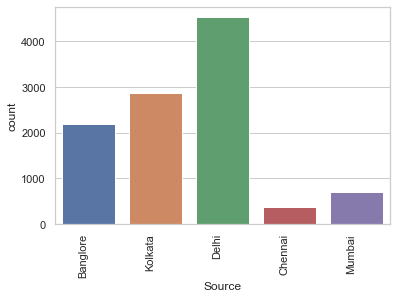

In [417]:
chart=sns.countplot(x='Source',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) The dataset contains the flight travel details from 5 different five metro city

(ii) Maximum flight's source is Delhi

(iii) Comparitavely 

<AxesSubplot:xlabel='Destination', ylabel='count'>

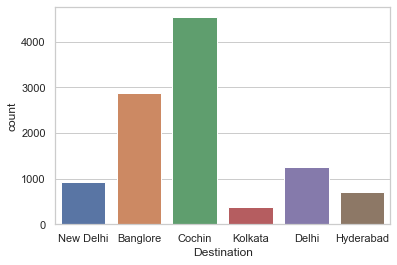

In [418]:
sns.countplot(x='Destination',data=df)

<AxesSubplot:xlabel='Price', ylabel='Density'>

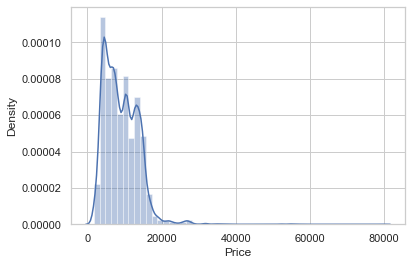

In [419]:
sns.distplot(df['Price'])

Price range lies maximum 0-20000

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

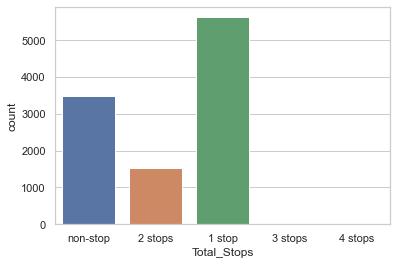

In [420]:
sns.countplot(x='Total_Stops',data=df)

Maximum travel is 1 stop 

In [421]:
df['month'].value_counts()

Jun    2536
Mar    2211
May    2074
Sep    1406
Jan    1075
Dec     957
Apr     424
Name: month, dtype: int64

In [422]:
df['day']=pd.DatetimeIndex(df['Date_of_Journey']).day

<AxesSubplot:xlabel='month', ylabel='Price'>

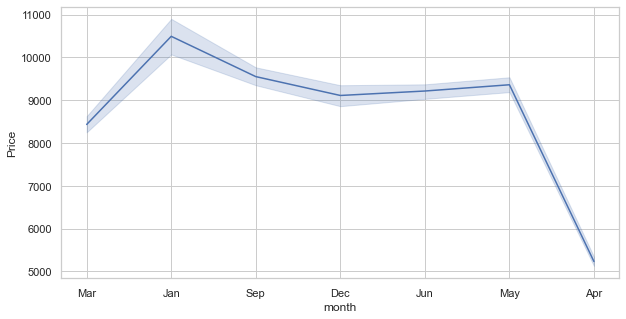

In [423]:
plt.figure(figsize=(10,5))
sns.set_theme(style='whitegrid')
sns.lineplot(x='month',y='Price',data=df)

As per available dataset if month is considered againts price then
we found the follwing observation

(i) In month of January the flght price is at peak

(ii) In April the flight price is at lowest

<AxesSubplot:xlabel='month', ylabel='count'>

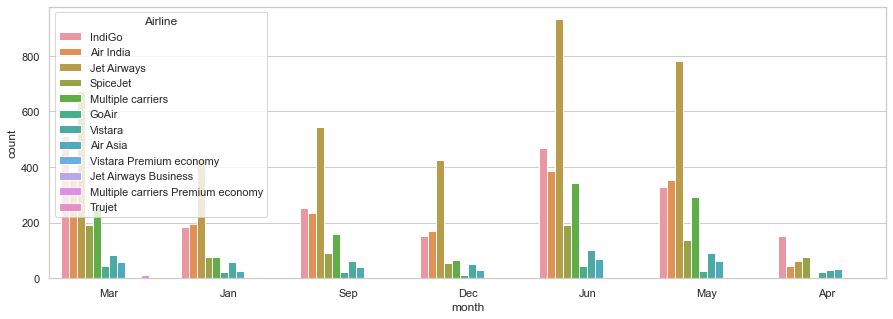

In [424]:
plt.figure(figsize=(15,5))
sns.countplot(x='month',hue='Airline',data=df)

(i) Jet Airways is in higher position expect March and April

(ii) Indigo is top for number of flight in March and April 

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  month            10683 non-null  object
 12  Duration_Mnt     10683 non-null  int64 
 13  DepTime          10683 non-null  object
 14  ArrTime          10683 non-null  object
 15  via1             10683 non-null  object
 16  via2             10683 non-null  object
 17  via3             10683 non-null

<AxesSubplot:xlabel='Duration_Mnt', ylabel='Price'>

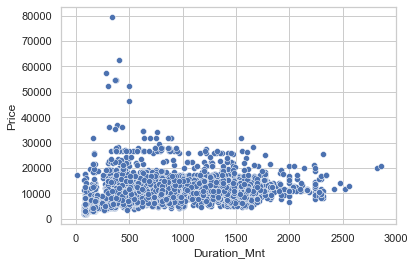

In [426]:
sns.scatterplot(x='Duration_Mnt',y='Price',data=df)

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

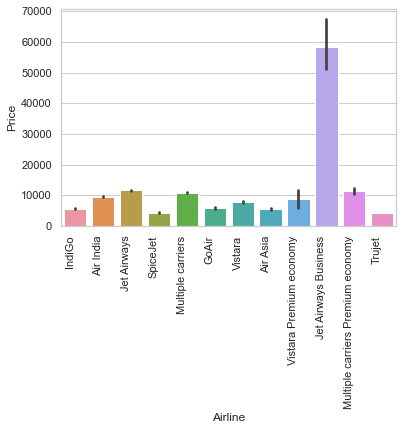

In [427]:
chart=sns.barplot(x='Airline',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) Jet Airways Business is costliest airline

(ii) Comparitively Indigo is cheapest airline

[Text(0, 0, 'IndiGo'),
 Text(1, 0, 'Air India'),
 Text(2, 0, 'Jet Airways'),
 Text(3, 0, 'SpiceJet'),
 Text(4, 0, 'Multiple carriers'),
 Text(5, 0, 'GoAir'),
 Text(6, 0, 'Vistara'),
 Text(7, 0, 'Air Asia'),
 Text(8, 0, 'Vistara Premium economy'),
 Text(9, 0, 'Jet Airways Business'),
 Text(10, 0, 'Multiple carriers Premium economy'),
 Text(11, 0, 'Trujet')]

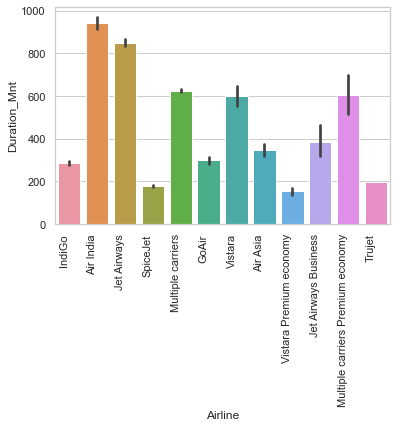

In [428]:
chart=sns.barplot(x='Airline',y='Duration_Mnt',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

[Text(0, 0, 'BLR → DEL'),
 Text(1, 0, 'CCU → IXR → BBI → BLR'),
 Text(2, 0, 'DEL → LKO → BOM → COK'),
 Text(3, 0, 'CCU → NAG → BLR'),
 Text(4, 0, 'BLR → NAG → DEL'),
 Text(5, 0, 'CCU → BLR'),
 Text(6, 0, 'BLR → BOM → DEL'),
 Text(7, 0, 'DEL → BOM → COK'),
 Text(8, 0, 'DEL → BLR → COK'),
 Text(9, 0, 'MAA → CCU'),
 Text(10, 0, 'CCU → BOM → BLR'),
 Text(11, 0, 'DEL → AMD → BOM → COK'),
 Text(12, 0, 'DEL → PNQ → COK'),
 Text(13, 0, 'DEL → CCU → BOM → COK'),
 Text(14, 0, 'BLR → COK → DEL'),
 Text(15, 0, 'DEL → IDR → BOM → COK'),
 Text(16, 0, 'DEL → LKO → COK'),
 Text(17, 0, 'CCU → GAU → DEL → BLR'),
 Text(18, 0, 'DEL → NAG → BOM → COK'),
 Text(19, 0, 'CCU → MAA → BLR'),
 Text(20, 0, 'DEL → HYD → COK'),
 Text(21, 0, 'CCU → HYD → BLR'),
 Text(22, 0, 'DEL → COK'),
 Text(23, 0, 'CCU → DEL → BLR'),
 Text(24, 0, 'BLR → BOM → AMD → DEL'),
 Text(25, 0, 'BOM → DEL → HYD'),
 Text(26, 0, 'DEL → MAA → COK'),
 Text(27, 0, 'BOM → HYD'),
 Text(28, 0, 'DEL → BHO → BOM → COK'),
 Text(29, 0, 'DEL → JAI → BOM

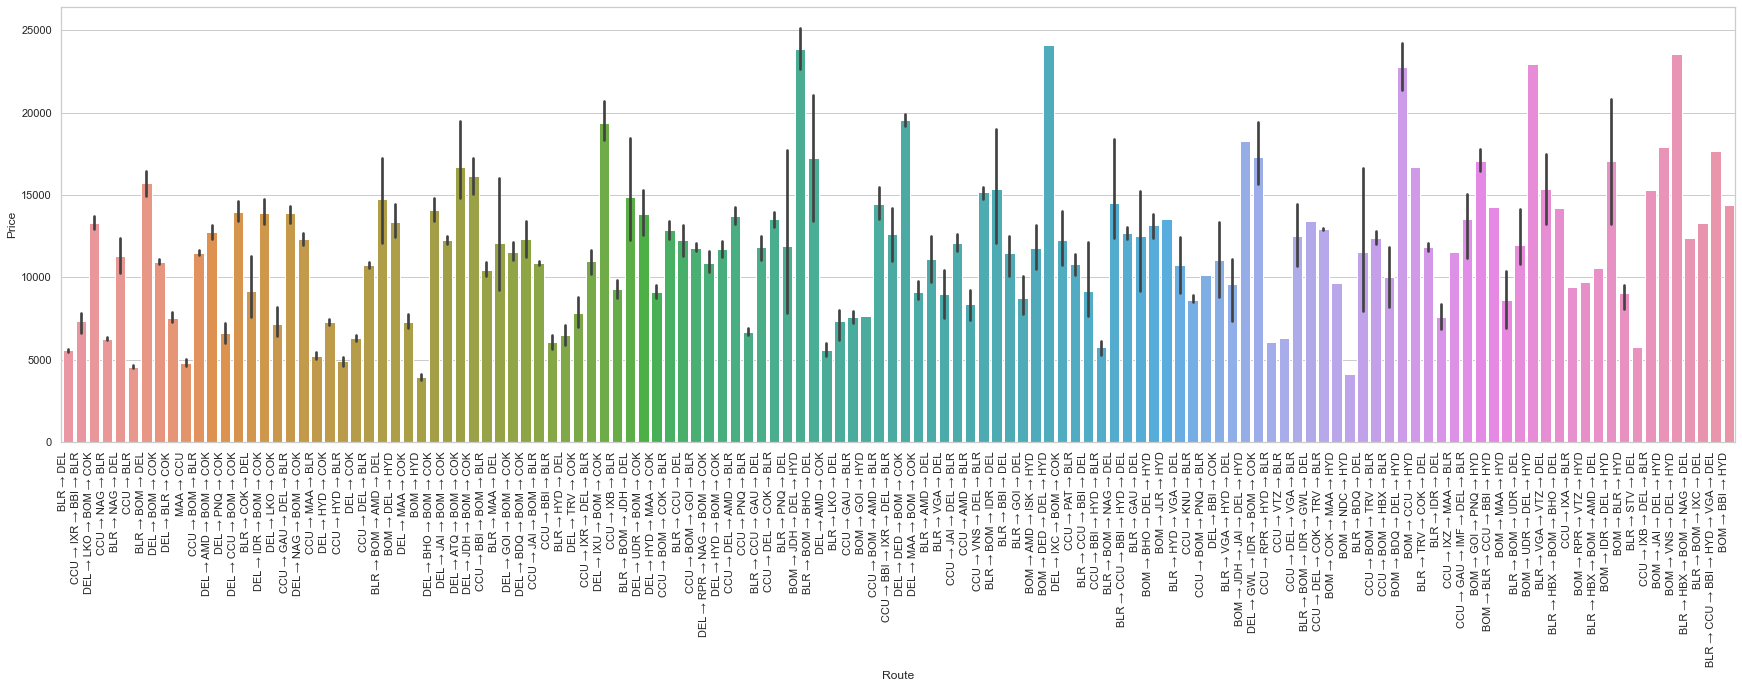

In [429]:
plt.figure(figsize=(30,8))
chart=sns.barplot(x='Route',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

Costlier Route

(i)Bom-Jodh-Del-Hyd

(ii)Bom-Ded-Del-Hyd

(iii)Bom-Bdq-Del-Hyd

(iv)Bom-Udr-Del-Hyd

(v)Bom-Jai-Del-Hyd

Cheaper Route

(i) Bom-Hyd

(ii) Ccu- Bglr

(iii) Bom - NDC- Hyd

[Text(0, 0, 'No info'),
 Text(1, 0, 'In-flight meal not included'),
 Text(2, 0, 'No check-in baggage included'),
 Text(3, 0, '1 Short layover'),
 Text(4, 0, 'No Info'),
 Text(5, 0, '1 Long layover'),
 Text(6, 0, 'Change airports'),
 Text(7, 0, 'Business class'),
 Text(8, 0, 'Red-eye flight'),
 Text(9, 0, '2 Long layover')]

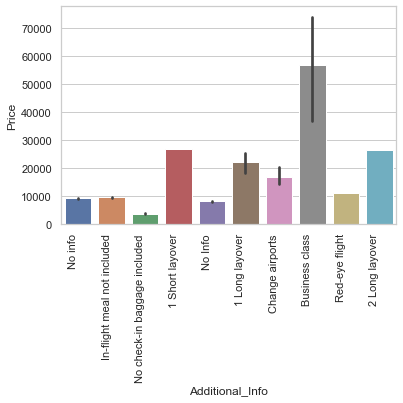

In [430]:
chart=sns.barplot(x='Additional_Info',y='Price',data=df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90,horizontalalignment='right')

(i) Business class has the highest price

(ii) No-check-in baggage has the lowest price

<AxesSubplot:xlabel='DepTime', ylabel='Price'>

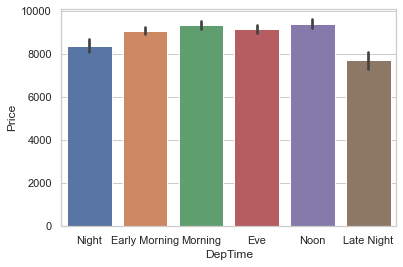

In [431]:
sns.barplot(x='DepTime',y='Price',data=df)

(i) Departure time Morning and Noon has higher flight price

(ii) Late Night Departure flights has less price

<AxesSubplot:xlabel='DepTime', ylabel='Price'>

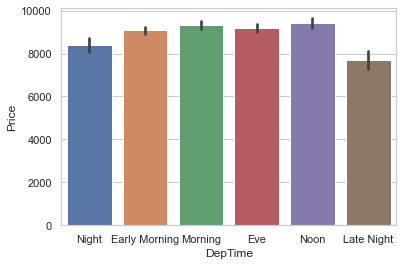

In [432]:
sns.barplot(x='DepTime',y='Price',data=df)

(i) Arrival time Morning and Noon has higher flight price

(ii) Late Night Arrival flights has less price

<AxesSubplot:xlabel='DepTime', ylabel='count'>

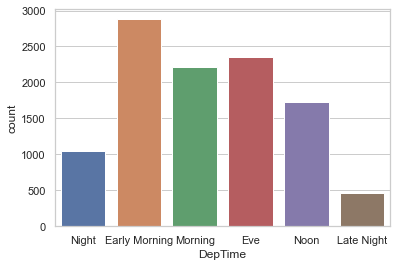

In [433]:
sns.countplot(x='DepTime',data=df)

(i) Number of flights are more in Early Morning departure time

(ii) Late Night departure time flights are less

<AxesSubplot:xlabel='ArrTime', ylabel='count'>

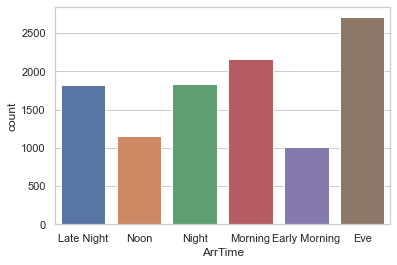

In [434]:
sns.countplot(x='ArrTime',data=df)

(i) Number of flights are more in Evening arrival time

(ii) Earky morning arrival time flights are less

# Feature Engineering

In [435]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10683 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10683 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  month            10683 non-null  object
 12  Duration_Mnt     10683 non-null  int64 
 13  DepTime          10683 non-null  object
 14  ArrTime          10683 non-null  object
 15  via1             10683 non-null  object
 16  via2             10683 non-null  object
 17  via3             10683 non-null

In [436]:
# checking the unique values of destination
df.Destination.unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [437]:
# encoding the destination in common name
df['Destination'] = df['Destination'].replace({'New Delhi': 'DEL', 'Banglore':'BLR','Cochin':'COK','Kolkata':'CCU',
                                               'Delhi':'DEL','Hyderabad':'HYD'})


In [438]:
#checking the unique names of source
df.Source.unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [439]:
#encoding the source into common name as destination
df['Source'] = df['Source'].replace({'Chennai': 'MAA', 'Banglore':'BLR','Kolkata':'CCU',
                                               'Delhi':'DEL','Mumbai':'BOM'})

In [440]:
#creating list for encoding the via columns
replace_values = {'None':0,
                  'AMD':1,
                  'ATQ':2,
                 'BBI':3,
                 'BDQ':4,
                 'BHO':5,
                 'BLR':6,
                 'BOM':7,
                 'CCU':8,
                 'COK':9,
                 'DED':10,
                 'DEL':11,
                 'GAU':12,
                 'GOI':13,
                 'GWL':14,
                 'HBX':15,
                 'HYD':16,
                 'IDR':17,
                 'IMF':18,
                 'ISK':19,
                 'IXA':20,
                 'IXB':21,
                 'IXC':22,
                 'IXR':23,
                 'IXU':24,
                 'IXZ':25,
                 'JAI':26,
                 'JDH':27,
                 'JLR':28,
                 'KNU':29,
                 'LKO':30,
                 'MAA':31,
                 'NAG':32,
                 'NDC':33,
                 'PAT':34,
                 'PNQ':35,
                 'RPR':36,
                 'STV':37,
                 'TIR':38,
                 'TRV':39,
                 'UDR':40,
                 'VGA':41,
                 'VNS':42,
                 'VTZ':43}

In [441]:
df["Total_Stops"]=df["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [442]:
df["month"]=df["month"].replace({"Jan":1,"Mar":2,"Apr":3,"May":4,"Jun":5,"Sep":6,"Dec":7})

In [443]:
df.DepTime.unique()

array(['Night', 'Early Morning', 'Morning', 'Eve', 'Noon', 'Late Night'],
      dtype=object)

In [444]:
df["DepTime"]=df["DepTime"].replace({"Early Morning":1,"Morning":2,"Noon":3,"Eve":4,"Night":5,"Late Night":6})

In [445]:
df["ArrTime"]=df["ArrTime"].replace({"Early Morning":1,"Morning":2,"Noon":3,"Eve":4,"Night":5,"Late Night":6})

In [446]:
df=df.replace({"via1":replace_values})
df=df.replace({"via2":replace_values})
df=df.replace({"via3":replace_values})
df=df.replace({"via4":replace_values})
df=df.replace({"Source":replace_values})
df=df.replace({"Destination":replace_values})

In [447]:
df.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Additional_Info','Duration'],inplace=True,axis=1)

In [448]:
df.drop(['route1','route2','route3','route4'],inplace=True,axis=1)

In [449]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       10683 non-null  object
 1   Source        10683 non-null  int64 
 2   Destination   10683 non-null  int64 
 3   Total_Stops   10683 non-null  int64 
 4   Price         10683 non-null  int64 
 5   month         10683 non-null  int64 
 6   Duration_Mnt  10683 non-null  int64 
 7   DepTime       10683 non-null  int64 
 8   ArrTime       10683 non-null  int64 
 9   via1          10683 non-null  int64 
 10  via2          10683 non-null  int64 
 11  via3          10683 non-null  int64 
 12  via4          10683 non-null  int64 
 13  day           10683 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 1.1+ MB


In [450]:
# One hot encoding for airline
dumm=pd.get_dummies(df['Airline'])

In [451]:
df=df.join(dumm)

In [452]:
# droping the airline column as it has been encoded
df.drop('Airline',inplace=True,axis=1)

In [453]:
df.head()

,Source,Destination,Total_Stops,Price,month,Duration_Mnt,DepTime,ArrTime,via1,via2,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,6,11,0,3897,2,170,5,6,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8,6,2,7662,1,445,1,3,23,3,...,0,0,0,0,0,0,0,0,0,0
2,11,9,2,13882,6,1140,2,6,30,7,...,0,0,1,0,0,0,0,0,0,0
3,8,6,1,6218,7,325,4,5,32,0,...,0,1,0,0,0,0,0,0,0,0
4,6,11,1,13302,1,285,3,5,32,0,...,0,1,0,0,0,0,0,0,0,0


In [590]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


Statistical data

# Finding Correlation

<AxesSubplot:>

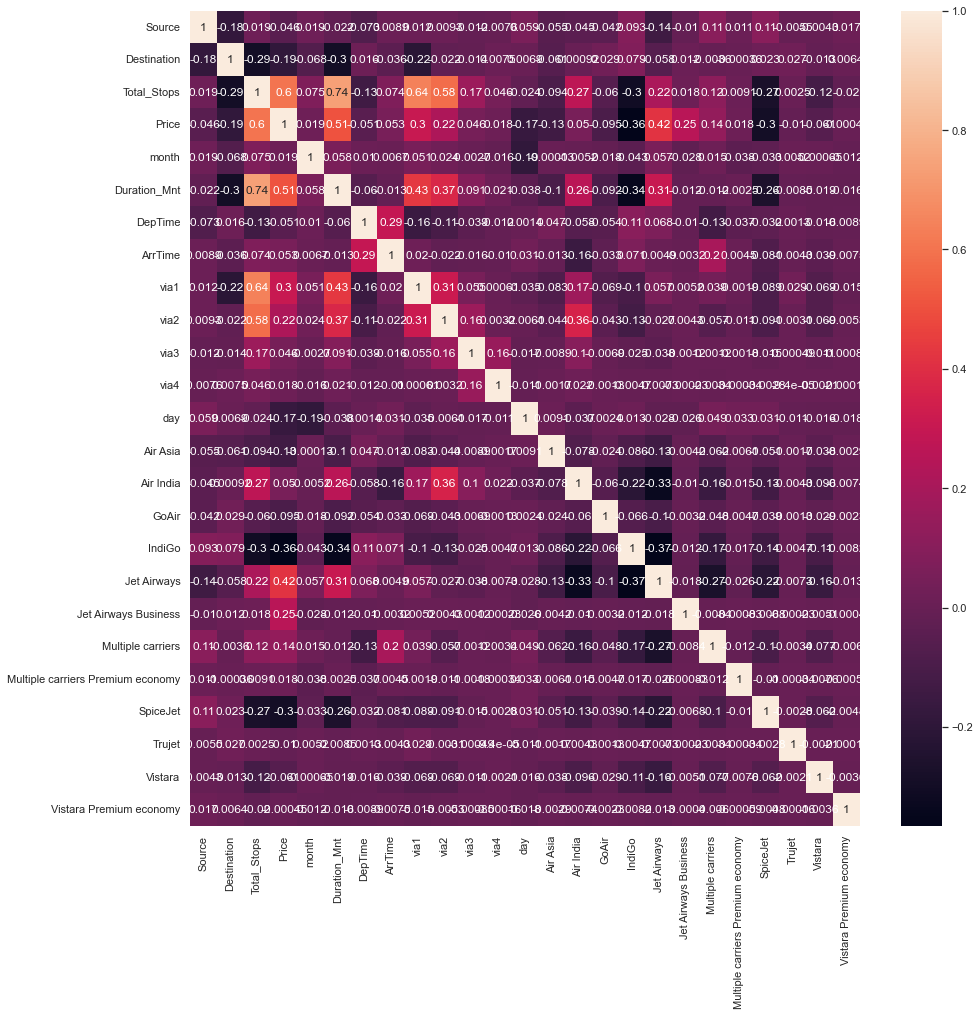

In [454]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

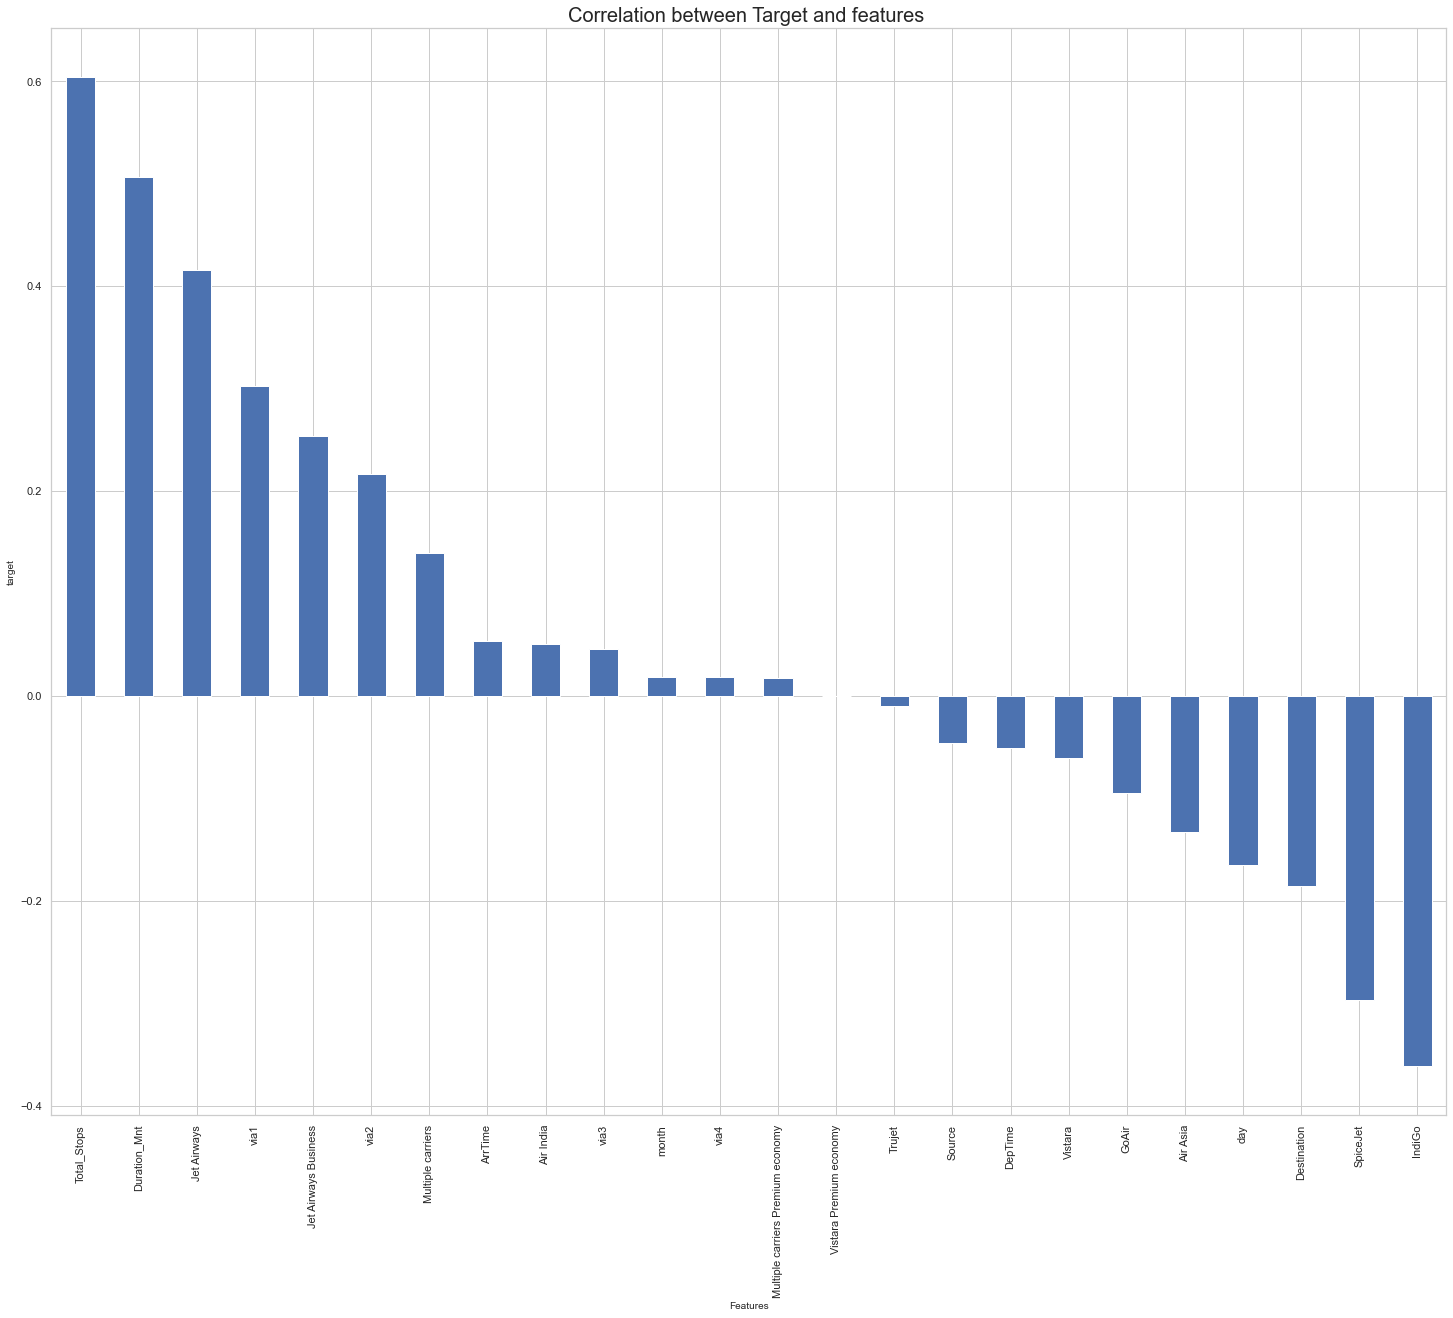

In [455]:
# generationg corraltion bar graph
plt.figure(figsize=(25,20))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='b')
plt.xlabel('Features',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('Correlation between Target and features ',fontsize=20)
plt.show()

(i) Total Stops, Duration,Jet Airways,Via1,Jet Air ways Businss, Multiple carrier etc are
hight positively correlated with Price

(ii) Indigo,Spice Jet,Destination,Day, Air Asia, Go Air etc are negatively
correlated with Price

# Removing the Outliers

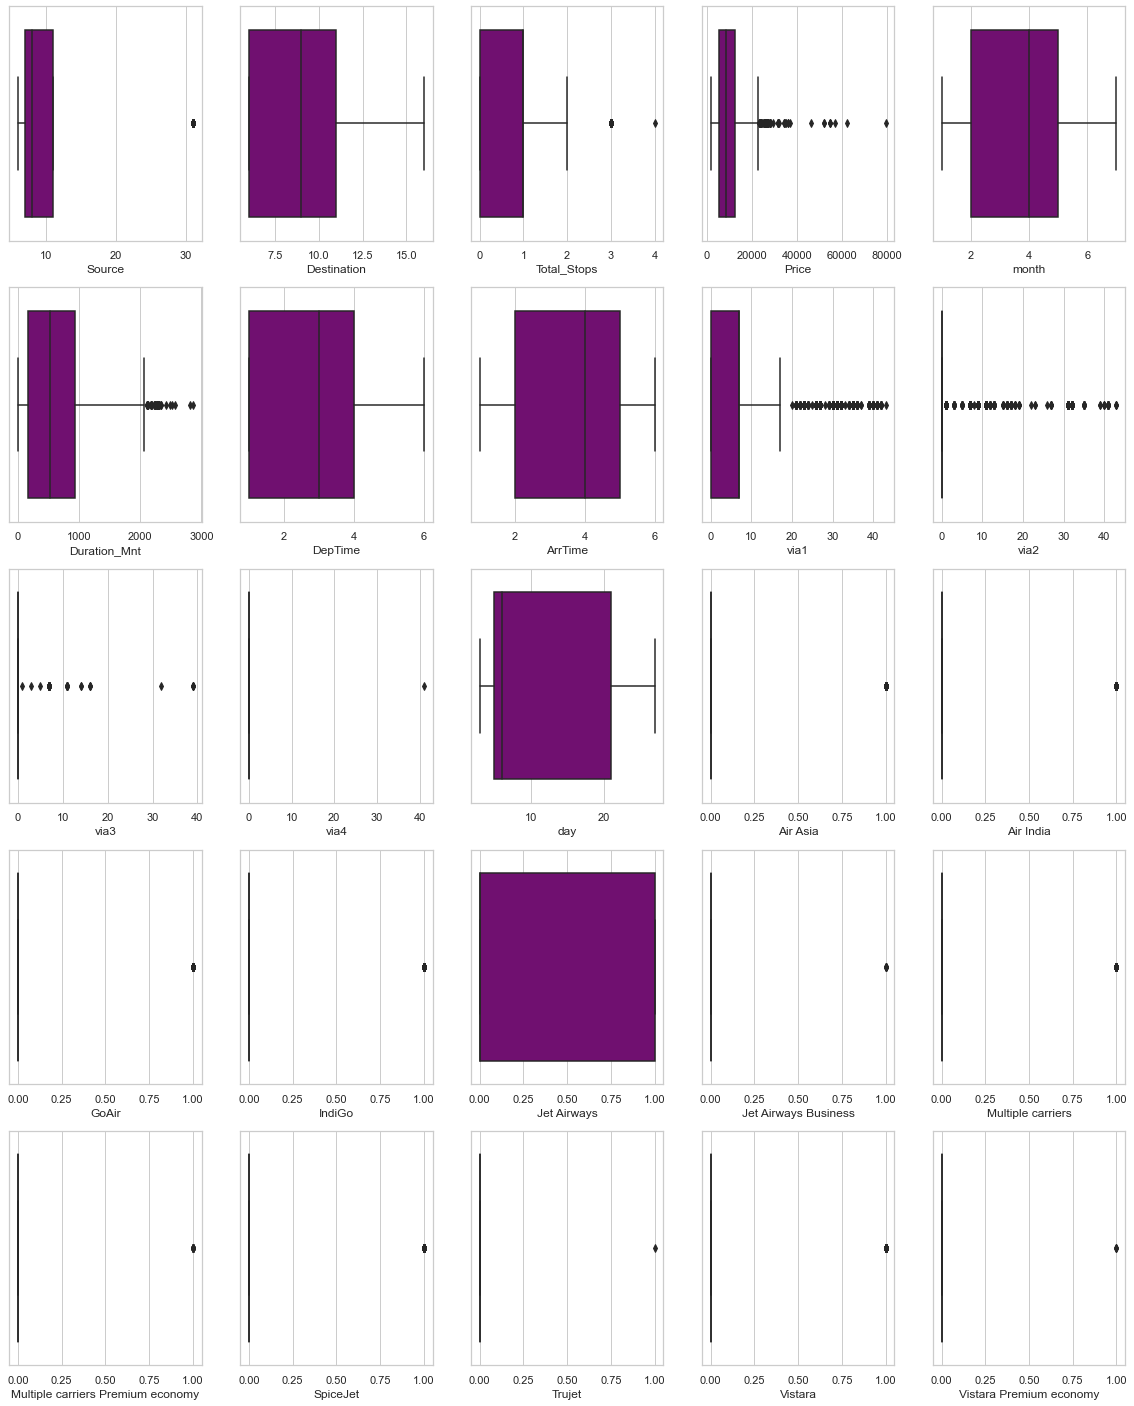

In [456]:
plt.figure(figsize=(20,25))
plotnum=1
for col in df.columns:
    if plotnum<=25:
        ax=plt.subplot(5,5,plotnum)
        sns.boxplot(df[col],color='purple')
        plt.xlabel(col,fontsize=12)
    plotnum+=1
plt.show()

Let us remove the outliers from features which are not encoded

We Found that max of the features are encoded from Categorical Data 
type, So we will not remove the outliers

# Spliting of Features and Target

In [457]:
x=df.drop("Price",axis=1)
y=df['Price']

# Removing the Skewness

In [458]:
x.skew()

Source                                 3.520165
Destination                            0.985280
Total_Stops                            0.317049
month                                 -0.137820
Duration_Mnt                           0.861074
DepTime                                0.346879
ArrTime                               -0.137759
via1                                   1.669177
via2                                   4.899658
via3                                  29.493293
via4                                 103.358599
day                                    0.367373
Air Asia                               5.525249
Air India                              1.815130
GoAir                                  7.218042
IndiGo                                 1.562748
Jet Airways                            0.582095
Jet Airways Business                  42.166335
Multiple carriers                      2.461716
Multiple carriers Premium economy     28.618184
SpiceJet                               3

# Scaling of data 

In [459]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

# Checking for Multicollinearity 

In [460]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,vif,Features
0,1.107742,Source
1,1.239702,Destination
2,4.887220,Total_Stops
3,1.051154,month
4,2.600380,Duration_Mnt
5,1.197447,DepTime
6,1.222103,ArrTime
7,1.848049,via1
8,1.817663,via2
9,1.073257,via3


We can consider all the columns

# Selecting best features

In [461]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

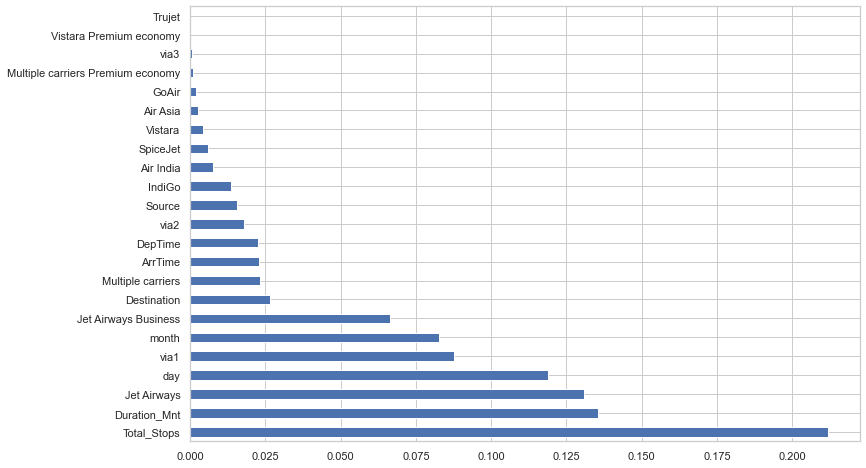

In [462]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()



# Spliting of features with best Random State

In [463]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Maximum r2 score is ",maxAccu,"at Random_state",maxRS)


Maximum r2 score is  0.8461848860415436 at Random_state 13


In [464]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=13)

# Searching for best model

In [465]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [477]:
def model_test(model):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print("Model Name :",model)
    print('R2_score:',r2_score(y_test,pred))
    print(mean_absolute_error(y_test,pred))
    print(mean_squared_error(y_test,pred))

In [478]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
svr=SVR()
SGD=SGDRegressor()
R=Ridge()
models=[lr,rfr,dtr,knn,svr,SGD,R]

In [479]:
for i in models:
    model_test(i)

Model Name : LinearRegression()
R2_score: 0.6346247351665498
2002.448317343048
7689848.444673934
Model Name : RandomForestRegressor()
R2_score: 0.8441855793729425
1153.593542725224
3279338.793398949
Model Name : DecisionTreeRegressor()
R2_score: 0.7486251898971508
1335.1683307332294
5290544.759182701
Model Name : KNeighborsRegressor()
R2_score: 0.7527601972642816
1573.8764430577223
5203517.576361935
Model Name : SVR()
R2_score: 0.06007855849105492
3387.5522264178544
19781999.85266636
Model Name : SGDRegressor()
R2_score: -44051715.081820495
19505102.785071876
927131782036254.4
Model Name : Ridge()
R2_score: 0.6351553831898578
1998.9555712717067
7678680.193099585


# Cross Validation Score

In [480]:
print('LR',cross_val_score(lr,x,y,cv=5).mean())
print('RFR',cross_val_score(rfr,x,y,cv=5).mean())
print('DTR',cross_val_score(dtr,x,y,cv=5).mean())
print('KNN',cross_val_score(knn,x,y,cv=5).mean())
print('SVR',cross_val_score(svr,x,y,cv=5).mean())
print('SGD',cross_val_score(SGD,x,y,cv=5).mean())
print('SGD',cross_val_score(R,x,y,cv=5).mean())

LR -7.051034089998424e+22
RFR 0.8159461618283143
DTR 0.723329738104668
KNN 0.7246089256124378
SVR 0.07849043267674131
SGD -9031579.402974205
SGD 0.589624738210456


After compairing all the score we found random forest regressor is the 
best regression model for buliding 

# Hyper Parameter Tuning

In [473]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[80,100,200,300],
            'criterion':['mse','mae'],
           'max_features':['auto','sqrt','log2'],
           'min_samples_split':[3,4,5,10,20],
           'max_depth':[2,4,6]}
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=3)
GCV.fit(x_train,y_train)
print('Best Parameters',GCV.best_params_)

Best Parameters {'criterion': 'mse', 'max_depth': 6, 'max_features': 'auto', 'min_samples_split': 10, 'n_estimators': 100}


In [476]:
#fin_model=RandomForestRegressor(criterion='mse',max_depth=6,max_features='auto',min_samples_split=10,n_estimators=100)
fin_model=RandomForestRegressor()
fin_model.fit(x_train,y_train)
pred=fin_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print(mean_absolute_error(y_test,pred))
print(mean_squared_error(y_test,pred))

R2_score: 0.8457253668138955
1149.344697216313
3246931.750017569


# Plotting of model

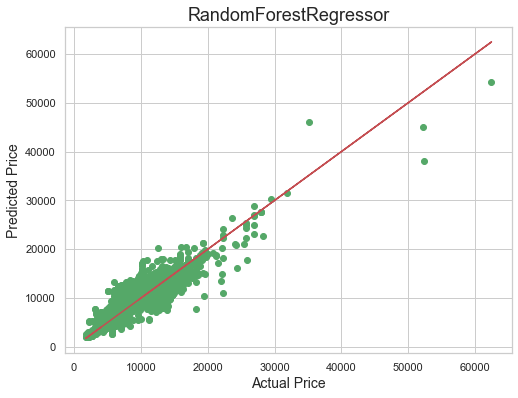

In [484]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show()

# Saving of Model

In [577]:
import joblib
joblib.dump(fin_model,'Flight_price_prediction.obj')

['Flight_price_prediction.obj']

# Test Data Pre Processing

In [547]:
df2=pd.read_excel('flight_price_test.xlsx')
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [548]:
df2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [549]:
#extracing the month
df2['month']=pd.DatetimeIndex(df2['Date_of_Journey']).month

In [550]:
df2['month']=df2['month'].apply(change_month)

In [551]:
duration2=df2['Duration'].tolist()

In [552]:
# converting the hours and minunits into minutes
for i in range(0,len(duration2)):
    duration2[i]=duration2[i].replace("h","*60").replace(" ","+").replace("m","")

In [553]:
for i in range(0,len(duration2)):
    duration2[i]=eval(duration2[i])

In [554]:
df2['Duration_Mnt']=pd.DataFrame({'Duration_Mnt':duration2})

In [555]:
df2['DepTime']=df2.Dep_Time.str.split(':').str[0]
df2['ArrTime']=df2.Arrival_Time.str.split(':').str[0]

In [556]:
df2[["DepTime","ArrTime"]]=df2[["DepTime","ArrTime"]].apply(pd.to_numeric)

In [557]:
df2['DepTime']=df2['DepTime'].apply(set_timing)
df2['ArrTime']=df2['ArrTime'].apply(set_timing)

In [558]:
# Creating columns for via info, initilised with none
df2['via1']='None'
df2['via2']='None'
df2['via3']='None'
df2['via4']='None'

In [559]:
#strored the via location in different list for via updation
df2['route1']=df.Route.str.split(' ').str[2]
df2['route2']=df.Route.str.split(' ').str[4]
df2['route3']=df.Route.str.split(' ').str[6]
df2['route4']=df.Route.str.split(' ').str[8]

In [560]:
df2['via1']=np.where((df2['Total_Stops']=='1 stop'),df2['route1'],df2['via1'])
df2['via1']=np.where((df2['Total_Stops']=='2 stops'),df2['route1'],df2['via1'])
df2['via1']=np.where((df2['Total_Stops']=='3 stops'),df2['route1'],df2['via1'])
df2['via1']=np.where((df2['Total_Stops']=='4 stops'),df2['route1'],df2['via1'])

df2['via2']=np.where((df2['Total_Stops']=='2 stops'),df2['route2'],df2['via2'])
df2['via2']=np.where((df2['Total_Stops']=='3 stops'),df2['route2'],df2['via2'])
df2['via2']=np.where((df2['Total_Stops']=='4 stops'),df2['route2'],df2['via2'])

df2['via3']=np.where((df2['Total_Stops']=='3 stops'),df2['route3'],df2['via3'])
df2['via3']=np.where((df2['Total_Stops']=='4 stops'),df2['route3'],df2['via3'])

df2['via4']=np.where((df2['Total_Stops']=='4 stops'),df2['route4'],df2['via4'])


In [561]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  month            2671 non-null   object
 11  Duration_Mnt     2671 non-null   int64 
 12  DepTime          2671 non-null   object
 13  ArrTime          2671 non-null   object
 14  via1             2671 non-null   object
 15  via2             2671 non-null   object
 16  via3             2671 non-null   object
 17  via4             2671 non-null   

In [562]:
#extracing the month
df2['day']=pd.DatetimeIndex(df2['Date_of_Journey']).day

In [563]:
# encoding the destination in common name
df2['Destination'] = df2['Destination'].replace({'New Delhi': 'DEL', 'Banglore':'BLR','Cochin':'COK','Kolkata':'CCU',
                                               'Delhi':'DEL','Hyderabad':'HYD'})


In [564]:
#encoding the source into common name as destination
df2['Source'] = df2['Source'].replace({'Chennai': 'MAA', 'Banglore':'BLR','Kolkata':'CCU',
                                               'Delhi':'DEL','Mumbai':'BOM'})

In [565]:
df2["Total_Stops"]=df2["Total_Stops"].replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})

In [566]:
df2["month"]=df2["month"].replace({"Jan":1,"Mar":2,"Apr":3,"May":4,"Jun":5,"Sep":6,"Dec":7})

In [567]:
df2["DepTime"]=df2["DepTime"].replace({"Early Morning":1,"Morning":2,"Noon":3,"Eve":4,"Night":5,"Late Night":6})

In [568]:
df2["ArrTime"]=df2["ArrTime"].replace({"Early Morning":1,"Morning":2,"Noon":3,"Eve":4,"Night":5,"Late Night":6})

In [569]:
df2=df2.replace({"via1":replace_values})
df2=df2.replace({"via2":replace_values})
df2=df2.replace({"via3":replace_values})
df2=df2.replace({"via4":replace_values})
df2=df2.replace({"Source":replace_values})
df2=df2.replace({"Destination":replace_values})

In [570]:
df2.drop(['Date_of_Journey','Route','Dep_Time','Arrival_Time','Additional_Info','Duration'],inplace=True,axis=1)

In [571]:
df2.drop(['route1','route2','route3','route4'],inplace=True,axis=1)

In [572]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Airline       2671 non-null   object
 1   Source        2671 non-null   int64 
 2   Destination   2671 non-null   int64 
 3   Total_Stops   2671 non-null   int64 
 4   month         2671 non-null   int64 
 5   Duration_Mnt  2671 non-null   int64 
 6   DepTime       2671 non-null   int64 
 7   ArrTime       2671 non-null   int64 
 8   via1          2671 non-null   int64 
 9   via2          2671 non-null   int64 
 10  via3          2671 non-null   int64 
 11  via4          2671 non-null   int64 
 12  day           2671 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 271.4+ KB


In [573]:
# One hot encoding for airline
dumm2=pd.get_dummies(df2['Airline'])

In [574]:
df2=df2.join(dumm2)

In [575]:
# droping the airline column as it has been encoded
df2.drop('Airline',inplace=True,axis=1)

# Predicting the test Data

In [578]:
#Loading the saved model
load_model=joblib.load('Flight_price_prediction.obj')

In [580]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7478 entries, 1705 to 338
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Source                             7478 non-null   float64
 1   Destination                        7478 non-null   float64
 2   Total_Stops                        7478 non-null   float64
 3   month                              7478 non-null   float64
 4   Duration_Mnt                       7478 non-null   float64
 5   DepTime                            7478 non-null   float64
 6   ArrTime                            7478 non-null   float64
 7   via1                               7478 non-null   float64
 8   via2                               7478 non-null   float64
 9   via3                               7478 non-null   float64
 10  via4                               7478 non-null   float64
 11  day                                7478 non-null   flo

In [581]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Source                             2671 non-null   int64
 1   Destination                        2671 non-null   int64
 2   Total_Stops                        2671 non-null   int64
 3   month                              2671 non-null   int64
 4   Duration_Mnt                       2671 non-null   int64
 5   DepTime                            2671 non-null   int64
 6   ArrTime                            2671 non-null   int64
 7   via1                               2671 non-null   int64
 8   via2                               2671 non-null   int64
 9   via3                               2671 non-null   int64
 10  via4                               2671 non-null   int64
 11  day                                2671 non-null   int64
 12  Air Asia            

In [584]:
df2['Trujet']=0 # adding a col to make it equal and initializing

In [585]:
test_pred=load_model.predict(df2)

In [586]:
pred_price=pd.DataFrame(data=test_pred)

In [587]:
df_predict=df2.join(pred_price)
df_predict.head()

,Source,Destination,Total_Stops,month,Duration_Mnt,DepTime,ArrTime,via1,via2,via3,...,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet,0
0,11,9,1,5,655,4,6,7,0,0,...,0,1,0,0,0,0,0,0,0,10292.878667
1,8,6,1,7,240,1,2,31,0,0,...,1,0,0,0,0,0,0,0,0,9693.296667
2,11,9,1,4,1425,4,4,7,0,0,...,0,1,0,0,0,0,0,0,0,10292.878667
3,11,9,1,4,780,1,5,7,0,0,...,0,0,0,1,0,0,0,0,0,9620.196667
4,6,11,0,5,170,5,6,0,0,0,...,0,0,0,0,0,0,0,0,0,9315.100000


In [589]:
df_predict.rename({0:"Price"},axis=1)

,Source,Destination,Total_Stops,month,Duration_Mnt,DepTime,ArrTime,via1,via2,via3,...,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Trujet,Price
0,11,9,1,5,655,4,6,7,0,0,...,0,1,0,0,0,0,0,0,0,10292.878667
1,8,6,1,7,240,1,2,31,0,0,...,1,0,0,0,0,0,0,0,0,9693.296667
2,11,9,1,4,1425,4,4,7,0,0,...,0,1,0,0,0,0,0,0,0,10292.878667
3,11,9,1,4,780,1,5,7,0,0,...,0,0,0,1,0,0,0,0,0,9620.196667
4,6,11,0,5,170,5,6,0,0,0,...,0,0,0,0,0,0,0,0,0,9315.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,8,6,1,5,1435,4,4,11,0,0,...,0,0,0,0,0,0,0,0,0,9983.941667
2667,8,6,0,2,155,3,3,0,0,0,...,1,0,0,0,0,0,0,0,0,9110.100000
2668,11,9,1,5,395,5,6,7,0,0,...,0,1,0,0,0,0,0,0,0,10292.878667
2669,11,9,1,5,915,6,4,7,0,0,...,0,0,0,0,0,0,0,0,0,9983.941667


# Completed